In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

%matplotlib inline

In [93]:
df= pd.read_csv(r"D:\Projects\Diamond price\notebooks\diamonds.csv")
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
17556,17557,1.02,Good,F,VS1,63.7,57.0,7068,6.35,6.39,4.06
31195,31196,0.32,Ideal,I,VVS1,61.9,55.0,756,4.40,4.39,2.72
32290,32291,0.31,Premium,J,SI1,59.4,62.0,453,4.43,4.39,2.62
40639,40640,0.41,Premium,E,VS1,61.8,58.0,1153,4.75,4.73,2.93
14376,14377,0.30,Premium,F,VS2,60.7,58.0,605,4.32,4.35,2.63


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [95]:
df.shape

(53940, 11)

In [96]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [97]:
df.duplicated().sum()

0

In [98]:
Cate_columns=df.columns[df.dtypes=="object"]
Num_columns=df.columns[df.dtypes!="object"]

In [99]:
df[Num_columns].corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [100]:
df[Num_columns].describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [101]:
df[Cate_columns].describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


<Axes: xlabel='count', ylabel='clarity'>

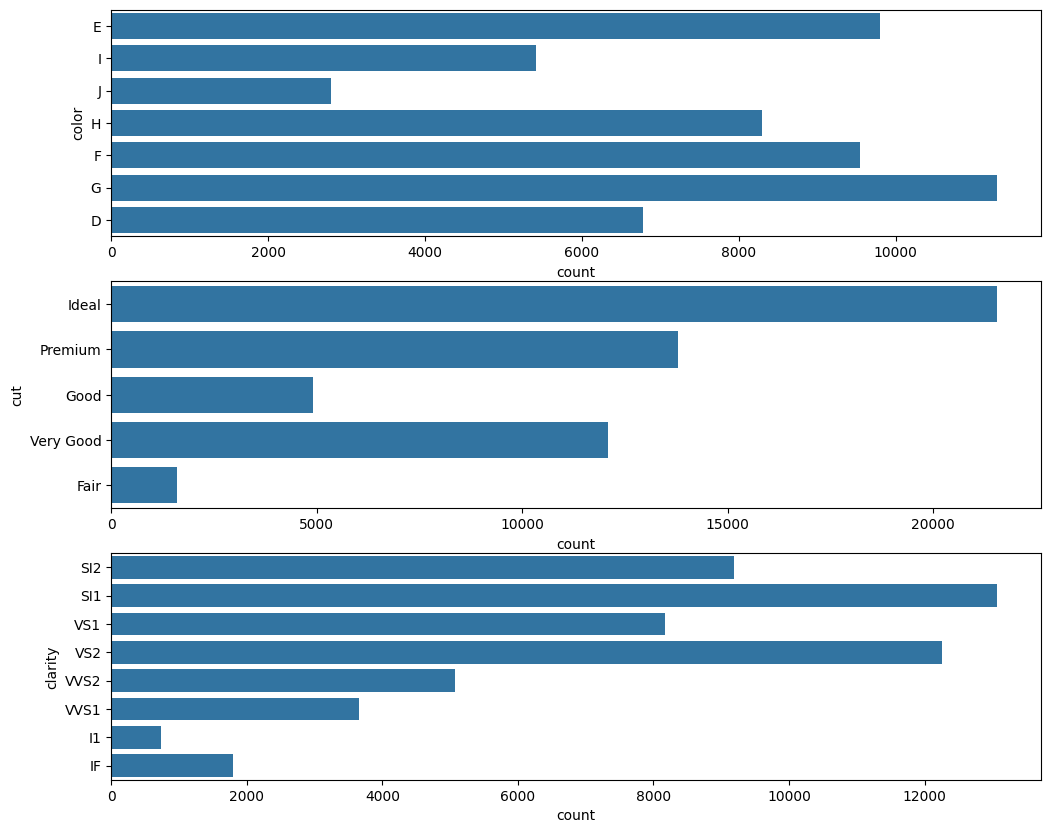

In [102]:
plt.figure(figsize=(12,10))

plt.subplot(3, 1,1)
sns.countplot(df["color"])


plt.subplot(3,1, 2)
sns.countplot(df["cut"])


plt.subplot(3,1, 3)
sns.countplot(df["clarity"])

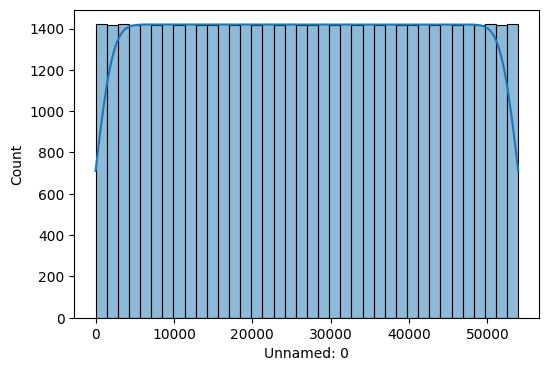

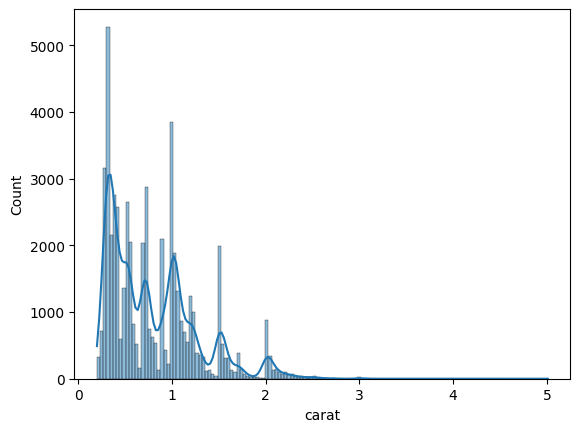

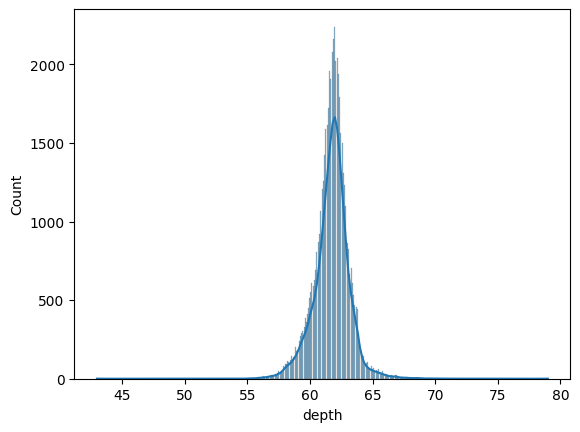

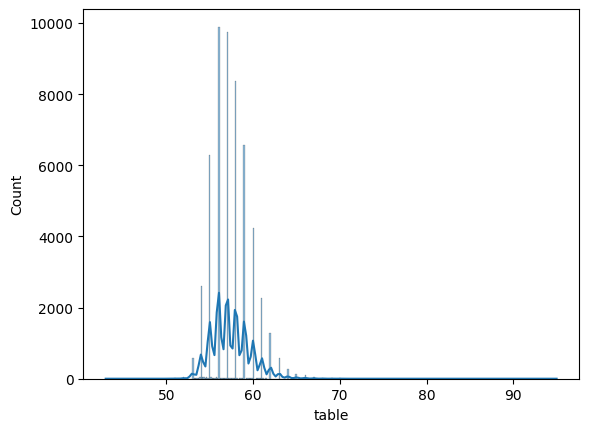

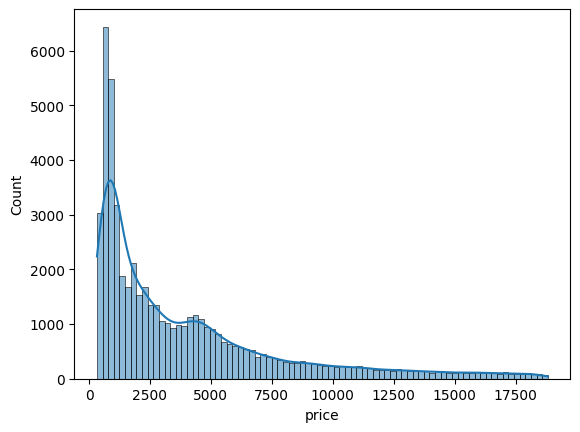

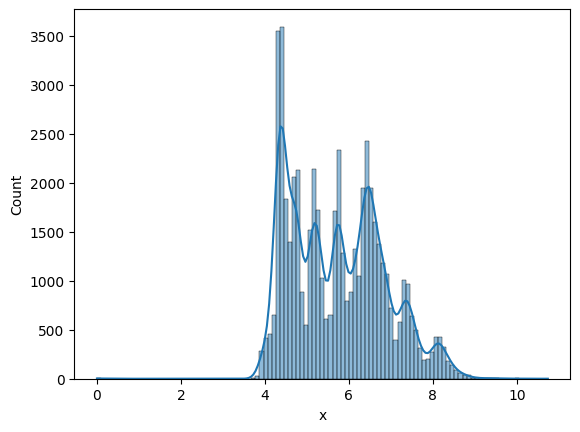

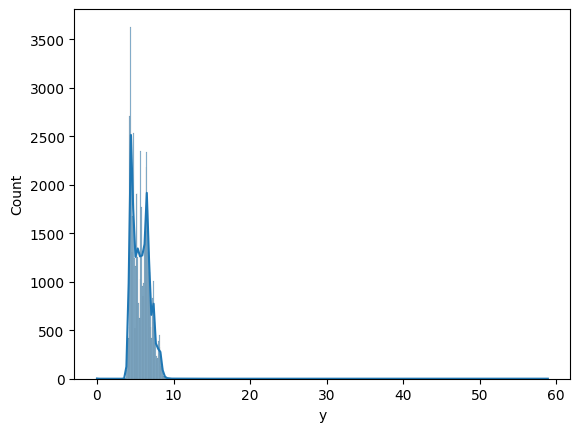

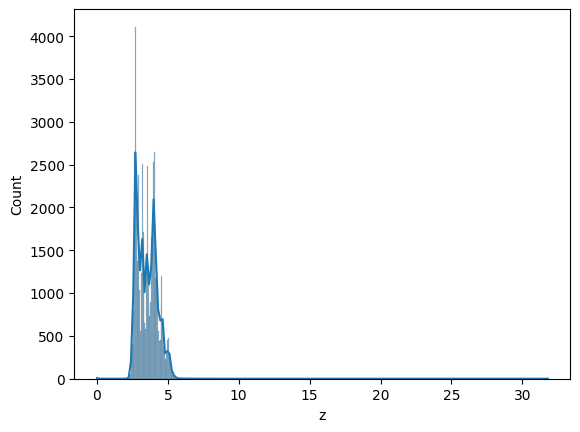

In [103]:
plt.figure(figsize=(6,4))

for col in Num_columns:
    sns.histplot(data=df, x=col, kde=True)
    print("\n")
    plt.show()

<Axes: >

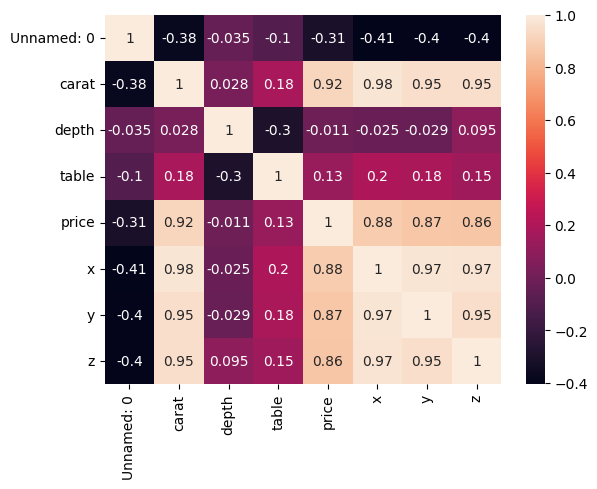

In [104]:
sns.heatmap(df[Num_columns].corr(), annot=True)

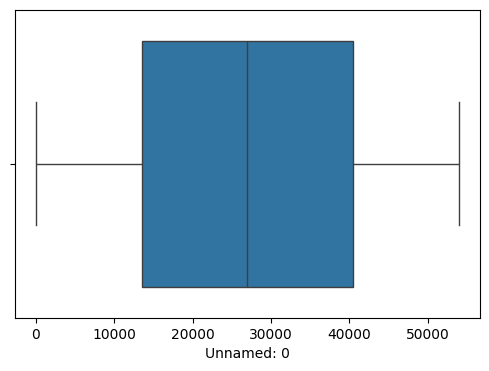

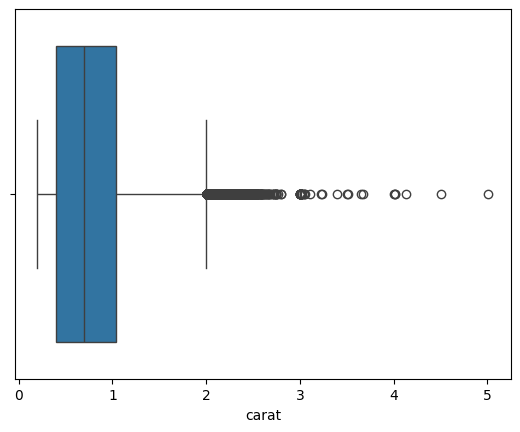

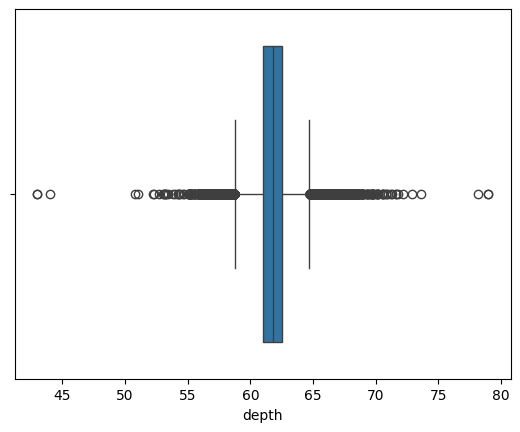

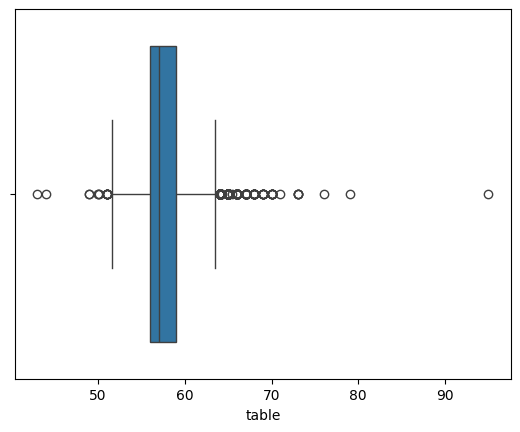

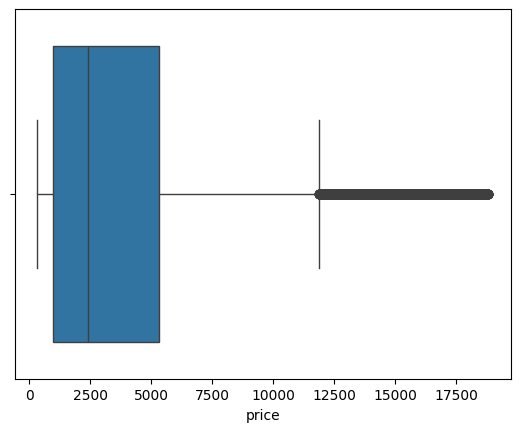

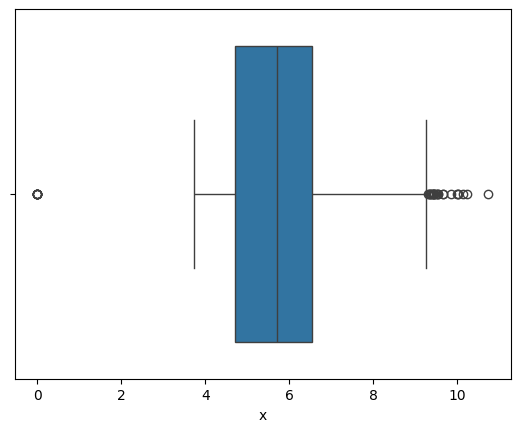

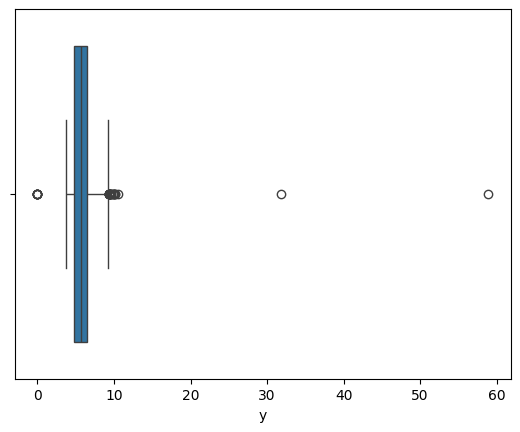

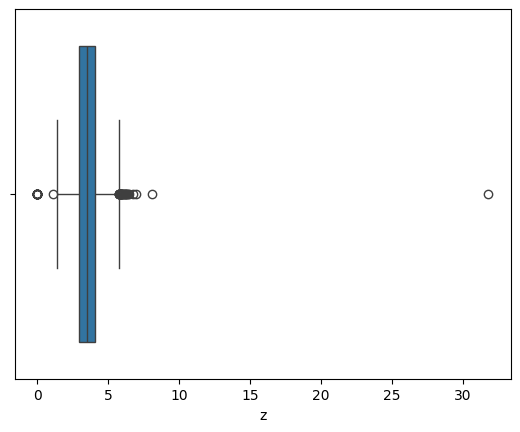

In [105]:
plt.figure(figsize=(6,4))

for col in Num_columns:
    sns.boxplot(data=df, x=col)
    print("\n")
    plt.show()

In [106]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='carat', ylabel='price'>

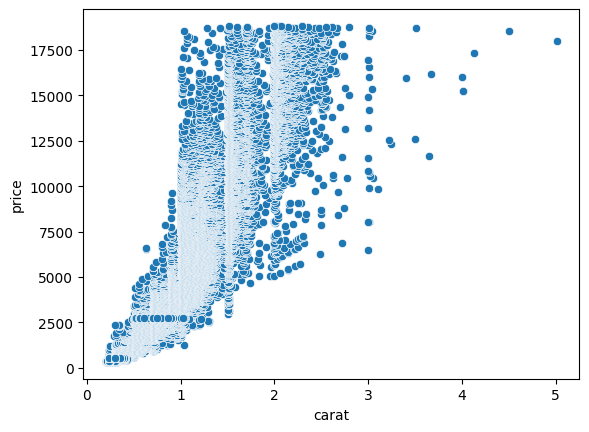

In [107]:
sns.scatterplot(data=df, x="carat", y="price")

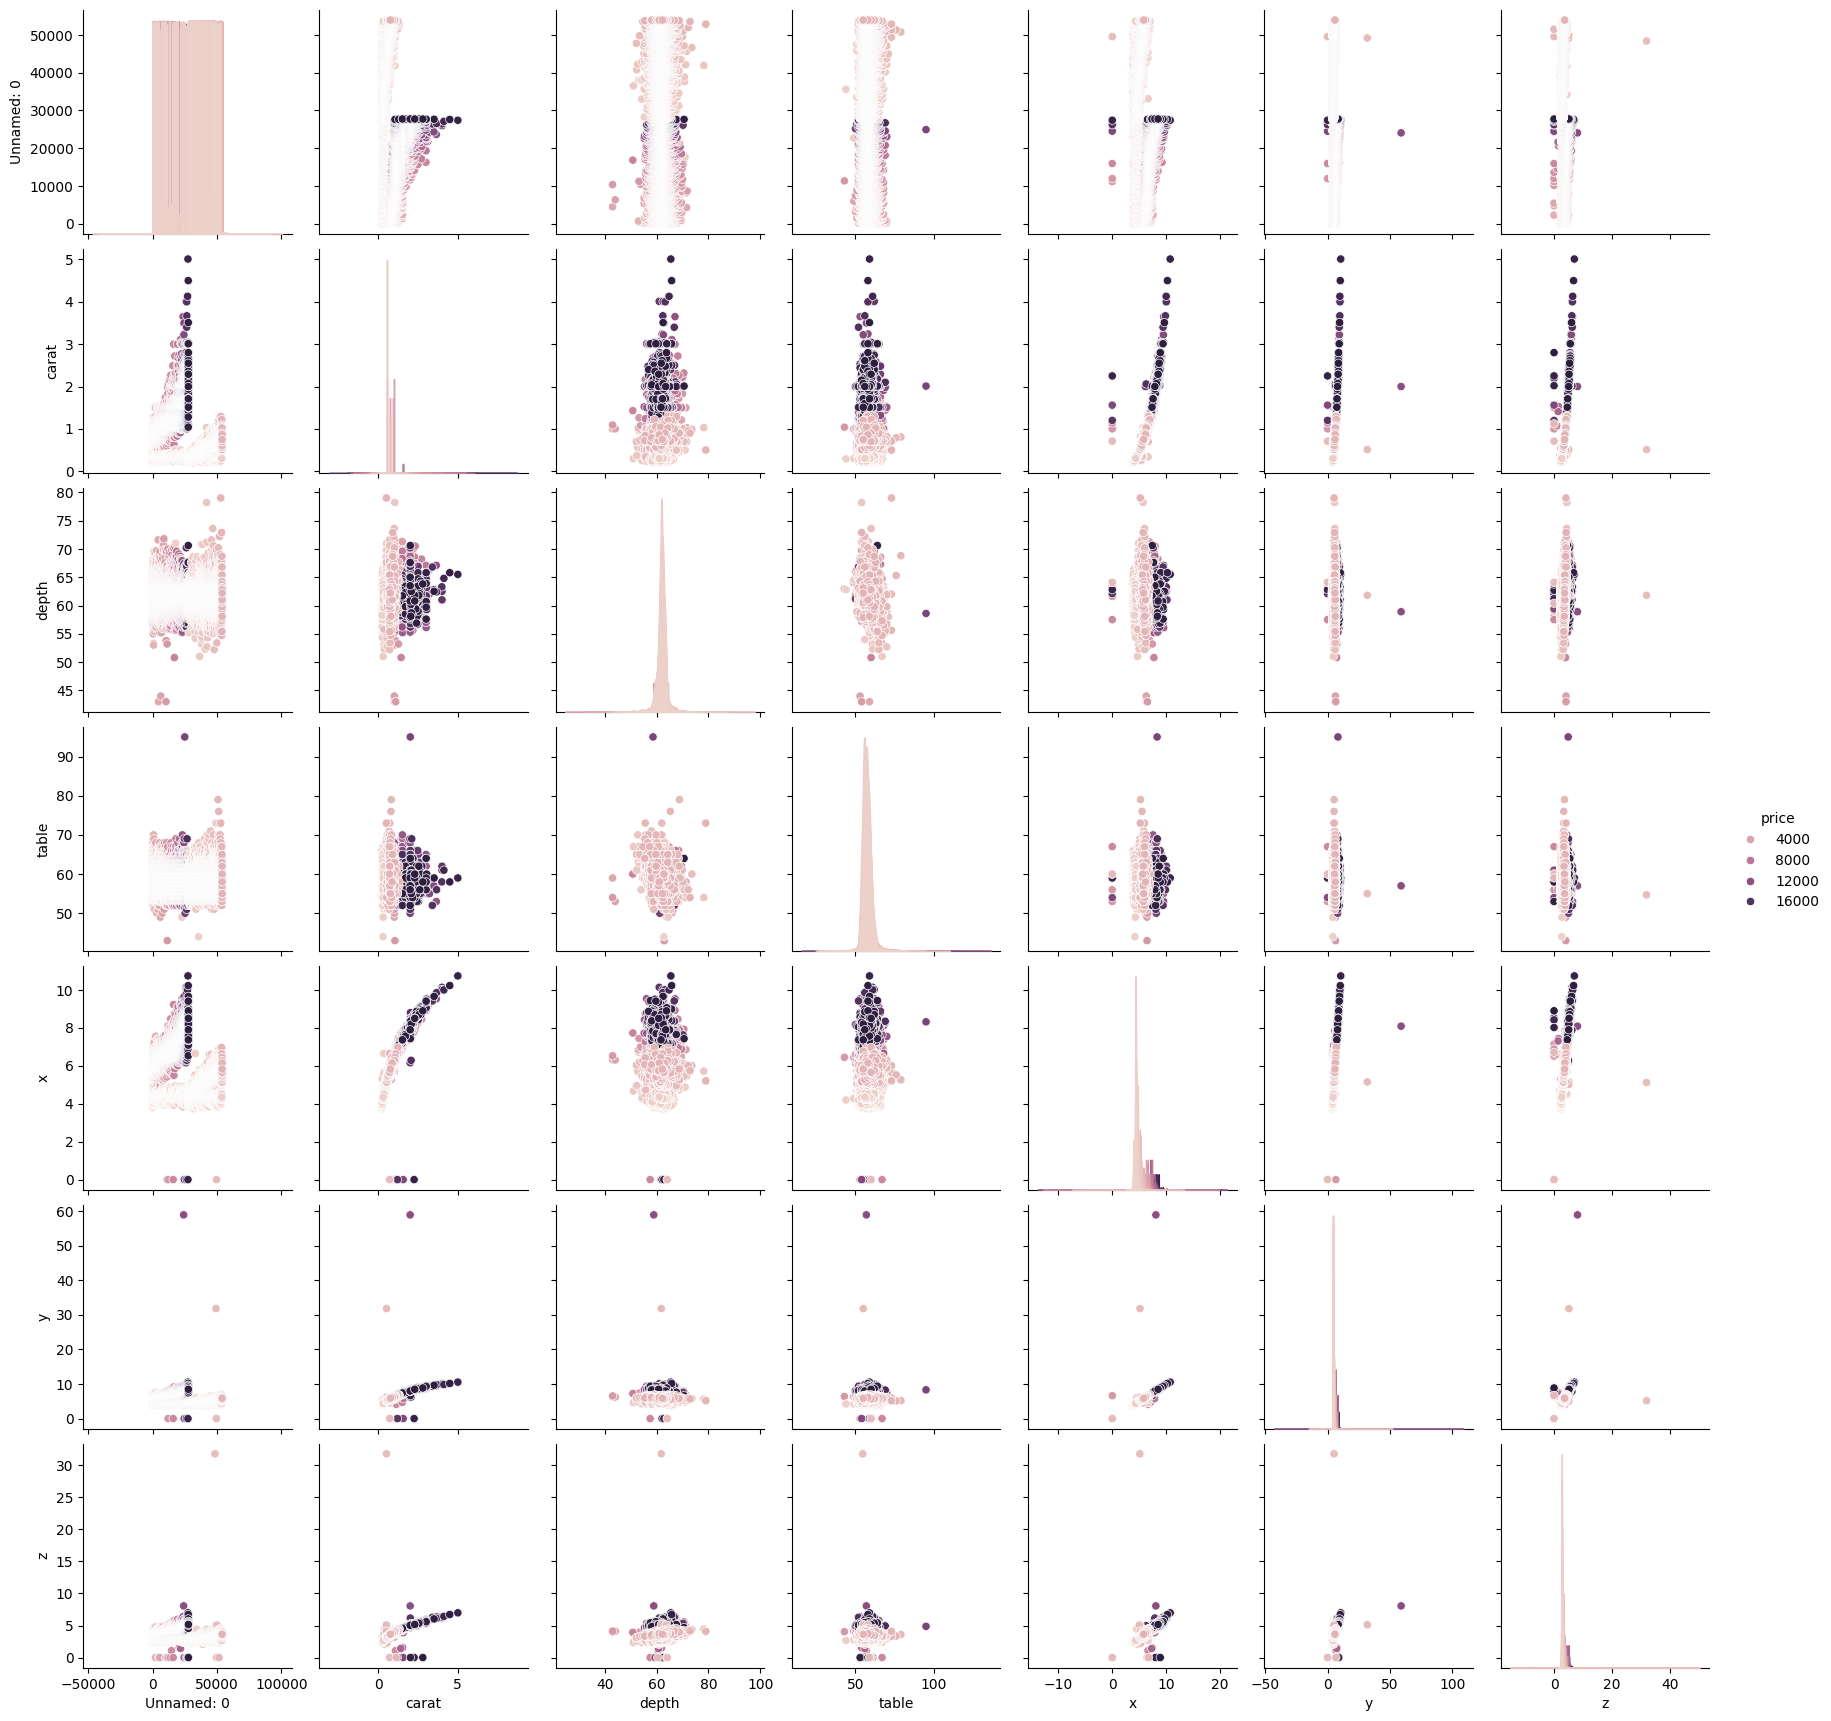

In [108]:
sns.pairplot(df,hue='price')

### FE

In [109]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [110]:
df= df.drop("Unnamed: 0",axis=1)

In [111]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [112]:
X= df.drop("price", axis=1)
y= df["price"]

In [129]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20 , random_state=42)

In [114]:
X_train.shape, y_train.shape

((43152, 9), (43152,))

In [115]:
X_train["cut"].value_counts()

cut
Ideal        17259
Premium      11016
Very Good     9700
Good          3902
Fair          1275
Name: count, dtype: int64

In [116]:
X_train["color"].unique()

array(['F', 'E', 'H', 'G', 'D', 'I', 'J'], dtype=object)

In [117]:
X_train["clarity"].unique()

array(['SI2', 'VS2', 'VS1', 'VVS1', 'SI1', 'IF', 'VVS2', 'I1'],
      dtype=object)

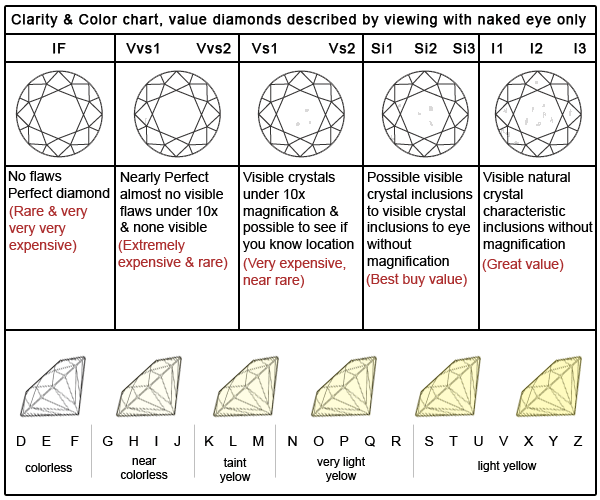

In [118]:
oe =  OrdinalEncoder(categories=[["Ideal", "Premium", "Very Good", "Good", "Fair" ],['D', 'E', 'F', 'G', 'H', 'I', 'J'], ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']], ["cut","color", "clarity" ] )

In [138]:
ct=ColumnTransformer([
    ("OE", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ["J", "I", "H", "G", "F", "E", "D"], ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]),["cut", "color", "clarity"])
], remainder="passthrough")


In [132]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
26546,2.01,Good,F,SI2,58.1,64.0,8.23,8.19,4.77
9159,1.01,Very Good,E,SI2,60.0,60.0,6.57,6.49,3.92
14131,1.10,Premium,H,VS2,62.5,58.0,6.59,6.54,4.10
15757,1.50,Good,E,SI2,61.5,65.0,7.21,7.17,4.42
24632,1.52,Very Good,G,VS1,62.1,57.0,7.27,7.32,4.53
...,...,...,...,...,...,...,...,...,...
11284,1.05,Very Good,I,VS2,62.4,59.0,6.48,6.51,4.05
44732,0.47,Ideal,D,VS1,61.0,55.0,5.03,5.01,3.06
38158,0.33,Very Good,F,IF,60.3,58.0,4.49,4.46,2.70
860,0.90,Premium,J,SI1,62.8,59.0,6.13,6.03,3.82


In [139]:
X_train_trans=ct.fit_transform(X_train)
X_test_trans=ct.transform(X_test)
X_train_trans

array([[1.  , 4.  , 1.  , ..., 8.23, 8.19, 4.77],
       [2.  , 5.  , 1.  , ..., 6.57, 6.49, 3.92],
       [3.  , 2.  , 3.  , ..., 6.59, 6.54, 4.1 ],
       ...,
       [2.  , 4.  , 7.  , ..., 4.49, 4.46, 2.7 ],
       [3.  , 0.  , 2.  , ..., 6.13, 6.03, 3.82],
       [3.  , 4.  , 2.  , ..., 6.82, 6.79, 4.11]])